# **MACHINE LEARNING LAB - 2**

# **Problem Statement : Assignment on Exploratory data analysis**

# Assignment on Exploratory data analysis

Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 

In [ ]:
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('haberman.csv')
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.
- Do not write your observations as comments in code cells.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


([<matplotlib.patches.Wedge at 0x7f4961406050>,
 [Text(-0.7410651721946901, 0.8129098415937984, '1'),
  Text(0.74106517219469, -0.8129098415937984, '2')],
 [Text(-0.40421736665164915, 0.4434053681420718, '73.5%'),
  Text(0.40421736665164903, -0.4434053681420718, '26.5%')])

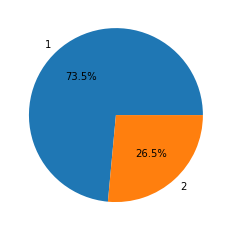

In [ ]:
# pie chart
plt.pie(df['status'].value_counts(), labels=df['status'].value_counts().index, autopct='%1.1f%%')

### 1.2 - Explain the objective of the problem.
(The objective for a problem can be defined as a brief explanation of problem that you are trying to solve using the given dataset)


*   The objective of this assignment is to preform exploratory data on analysis Hoberman Cancer Survival dataset obtained from Kaggle. The main aim is to preform univariate as well as bivariate analysis on the feature set to identify the bed features which can used for training different classification models.

### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot.
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Do write observations/inference for each plot.

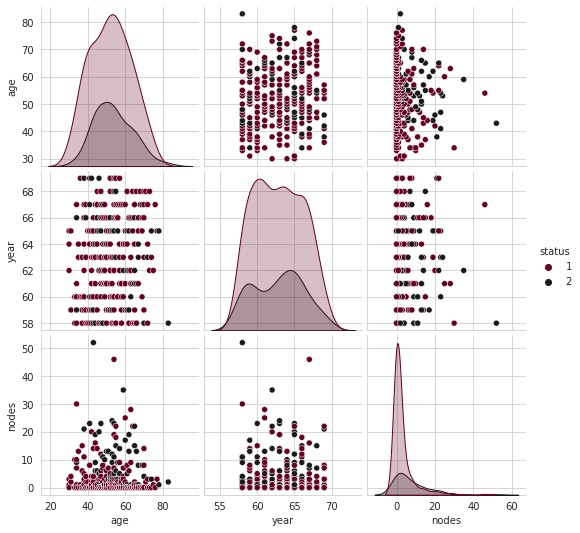

In [ ]:
import seaborn as sns

sns.set_style("whitegrid")
sns.pairplot(df, hue="status", palette="RdGy")
plt.show()

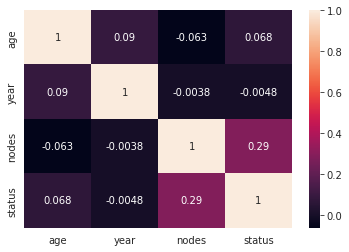

In [ ]:
sns.heatmap(df.corr(), annot=True)

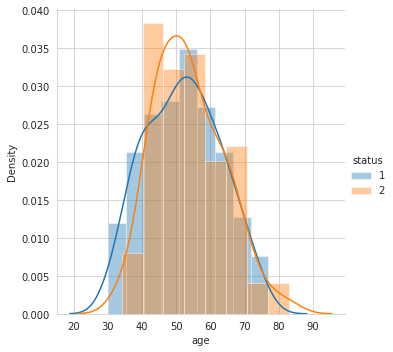

In [ ]:


sns.FacetGrid(df, hue="status", height=10, size=5) \
   .map(sns.distplot, "age") \
   .add_legend()

plt.show()



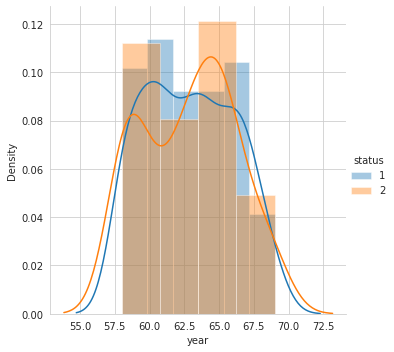

In [ ]:
sns.FacetGrid(df, hue="status", height=10, size=5) \
   .map(sns.distplot, "year") \
   .add_legend()
plt.show()



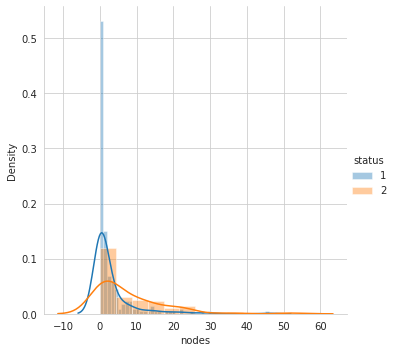

In [ ]:
sns.FacetGrid(df, hue="status", height=10, size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend()
plt.show()

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


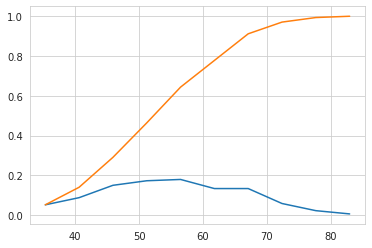

In [ ]:
counts, bin_edges = np.histogram(df['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


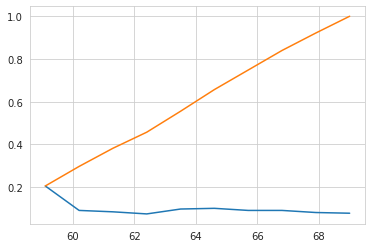

In [ ]:
counts, bin_edges = np.histogram(df['year'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


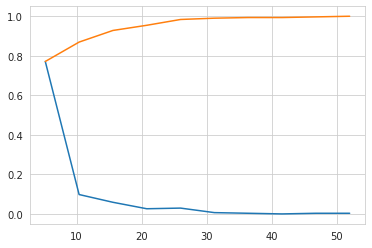

In [ ]:
counts, bin_edges = np.histogram(df['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

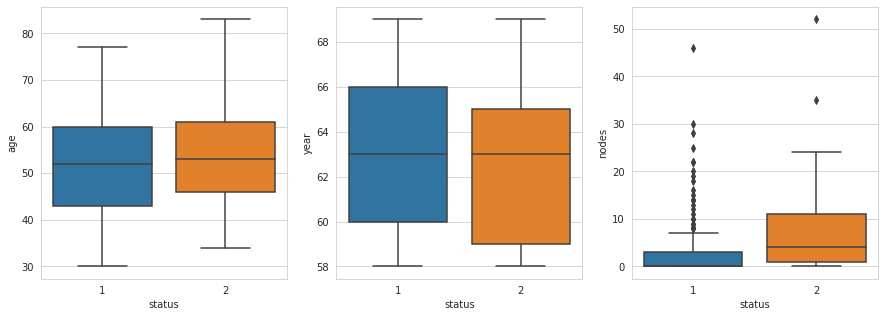

In [ ]:
fig, axes= plt.subplots(1,3, figsize=(15,5))
for idx, feature in enumerate(list(df.columns)[:-1]):
     sns.boxplot(data=df, x='status', y= feature, ax= axes[idx])

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Do write observations/inference for each  plot.


In [ ]:
status_1 = df[df['status'] == 1]
status_2 = df[df['status'] == 2]

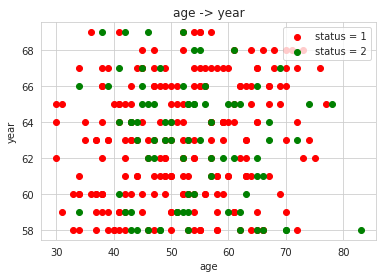

In [ ]:
plt.scatter(status_1['age'], status_1['year'], color='red', label='status = 1')
plt.scatter(status_2['age'], status_2['year'], color='green', label='status = 2')
plt.xlabel('age')
plt.ylabel('year')
plt.legend()
plt.title("age -> year")
plt.show()

* We cannot use age -> year for classification of status

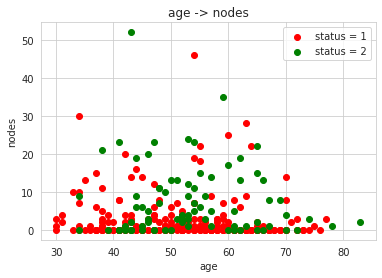

In [ ]:
plt.scatter(status_1['age'], status_1['nodes'], color='red', label='status = 1')
plt.scatter(status_2['age'], status_2['nodes'], color='green', label='status = 2')
plt.xlabel('age')
plt.ylabel('nodes')
plt.legend()
plt.title("age -> nodes")
plt.show()

* We cannot use age -> nodes for classification of status

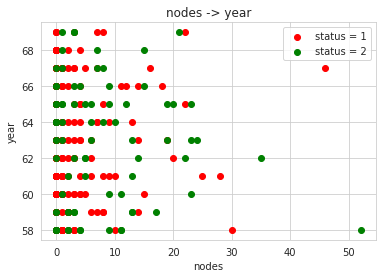

In [ ]:
plt.scatter(status_1['nodes'], status_1['year'], color='red', label='status = 1')
plt.scatter(status_2['nodes'], status_2['year'], color='green', label='status = 2')
plt.xlabel('nodes')
plt.ylabel('year')
plt.legend()
plt.title("nodes -> year")
plt.show()





* We cannot use nodes->year for classification of status

### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
-After performing the EDA on the dataset, we can conclude that none of the features aremore important than the others. Hence all of the features will be considered equal.

Exploratory Data Analysis:


*  There are 306 data points in the dataset.

*   There are 3 features in the dataset namely: Age, Op_Year, axil_nodes.
*   The output class is Surv_status which has two class labels 1 which depicts that patient survived 5 years or longer and 2 which depicts the patient died within 5 year 
* There are 255 data samples belonging to class 1 and 81 samples belonging to class Thus we can say that the datasks is imbalanced. 
*  Pie chart of the class label shows that 74% of the patient survived 5 years or longer whereas 26% of the patient died within 5 year.
*   After plotting the scatter plot for all the three features, we can conclude that there is overlapping between both the class label. Thus none of the feature can be linearly separated.

*  After plotting the PDF (Probability Distribution Function) for all the three features, we can conclude that there is overlapping between both the class label.

*  As we can observe from the 2D scatter plot and pair plot, that none of the feature pairs are linearly separable. Thus, we cannot give preference to any feature pair.